**Rejection Method**
Say if we want to generate random variable according to pdf $f(x)$, we first construct a "box" containing $f(x).$ Suppose we are able to draw random point y from the box continuously unifomrly, then the probability of $y\le f(x)$ will follow $f(x)$.

More precisely, we consider a pdf $g(x)$ that we know how to generate, and that $cg(x)\ge f(x)$ for some positive (greater than 1?) c. 
So the box is $\mathbb{R}\times [0, cg(x)]$
Then

* $\mbox{generate } v \sim g$
*  $\mbox{generate } y \sim U(0, cg(v))$
* $ \mbox{If } y\le f(v), \mbox{accept } v \mbox{ otherwise reject}.$

Note that the second and third steps can be replaced by
* $\mbox{generate } y \sim U(0, 1)$
* $ \mbox{If } y\le \frac{f(v)}{cg(v)}, \mbox{accept otherwise reject}.$


**Standard Normal Distribution**
In this example, we will use exponential distribution $g(x) = e^{-x}$ to bound 
standard normal $f(x)$. However, for $0<x<\infty$ for $g$. So we consider 
$$f(x) = \frac{2}{\sqrt{2\pi}}e^{-x^2/2}.$$
Once we get the variable, we evenly let it be positive or negative.


It is easy to see that we can take $c = \sqrt{2e/\pi}$, and 
$$\frac{f(v)}{cg(v)} = e^{-\frac{(v-1)^2}{2}}$$

In [162]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline 

#exponential distribution by inverse function method
def exp_distribution(lambda_):
        u = npr.uniform()
        return (-1.0/lambda_)*np.log(1-u)
    


#First digit: std normal random numbers
#Second digit: acceptance rate, note that it is close to 1/c=1/1.32
def std_normal(num_iter):
        #generate v from exp(lambda=1)
        v = np.array([exp_distribution(1) for i in range(num_iter)])
        
        #generate y from standard uniform
        y = npr.rand(num_iter)
        
        #accept according to acc-reject criterion
        accept = v[np.where(y<= np.exp(-((v-1)**2)/2))[0]]
        accept_y = y[np.where(y<= np.exp(-((v-1)**2)/2))[0]]
        reject = v[np.where(y> np.exp(-((v-1)**2)/2))[0]]
        reject_y = y[np.where(y> np.exp(-((v-1)**2)/2))[0]]
        #let accept be positive or negtive with probability 0.5 to 0.5
        judge = npr.rand(len(accept))
        z = np.where(judge<0.5, -accept, accept)
        
        return z, 100* float(len(accept))/len(v), accept_y
    




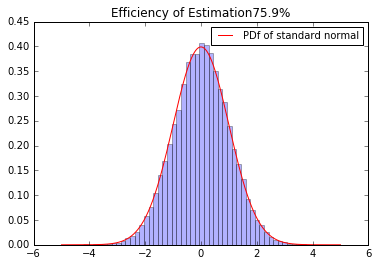

In [167]:
from scipy.stats import norm
num_iter = 50000
x = np.linspace(-5,5, num_iter)
sample = std_normal(num_iter)[0]
efficiency = std_normal(num_iter)[1]
fig, ax = plt.subplots()



ax.hist(sample, bins=50, normed=1, alpha = 0.3)
ax.plot(x,norm.pdf(x,0,1),'r', label='PDf of standard normal' )
ax.set_title('Efficiency of Estimation%3.1f%%'%efficiency ) 
ax.legend(fontsize=10)


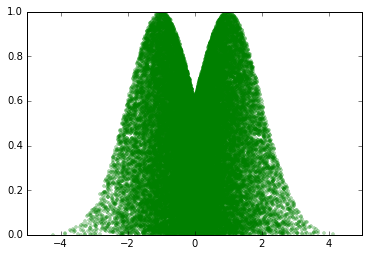

In [169]:
num_iter = 50000
sample = std_normal(num_iter)
z = sample[0]
y = sample[2]
fig, ax = plt.subplots()
ax.plot(z,y,'g.',label='accepted',alpha=.3)


In [172]:
        num_iter = 6
        v = np.array([exp_distribution(1) for i in range(num_iter)])
        
        #generate y from standard uniform
        y = npr.rand(num_iter)
        
        #accept according to acc-reject criterion
        accept = v[np.where(y<= np.exp(-((v-1)**2)/2))[0]]
        accept_y = y[np.where(y<= np.exp(-((v-1)**2)/2))[0]]
        judge = npr.rand(len(accept))
        z = np.where(judge<0.5, -accept, accept)
        
        print accept
        print z
        print np.where(z != accept)

[ 1.2627029   0.72837141  0.52937617]
[ 1.2627029   0.72837141  0.52937617]
(array([], dtype=int64),)
